In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Import the training & test datasets 
df_train=pd.read_csv("inputs/train.csv")
df_test=pd.read_csv("inputs/test.csv")

In [55]:
df_train.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
df_train_id=df_train['Id']
df_test_id=df_test['Id']

In [58]:
# Dropping the 'Id' column from both training & test data
df_train = df_train.drop(columns=['Id'],axis=1)
df_test = df_test.drop(columns=['Id'],axis=1)

<font size=5> __In this section we analyse the target variable 'SalePrice'__</font>

<font size=5>A plot of 'SalePrice' reveals the following:</font>
 - It deviates from the normal distribution
 - It is skewed towards the right (more values towards tail, positive skewness)
 - It shows a prominent peak (kurtosis)

In [59]:
# Describe the statistical properties of SalePrice (target) variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


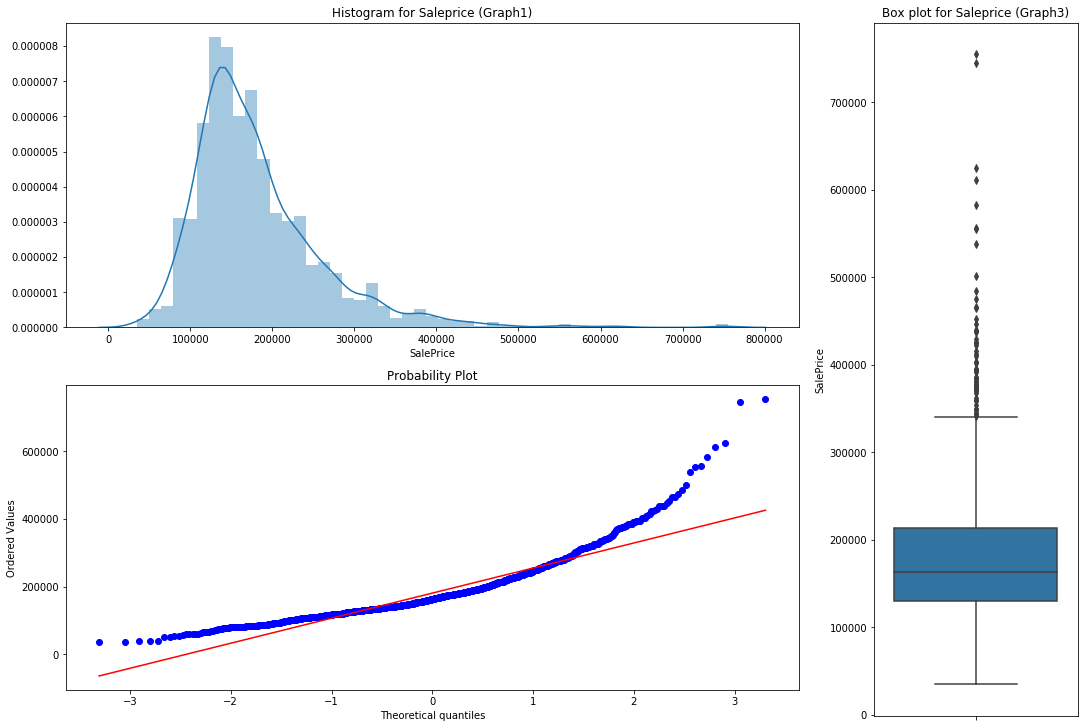

In [60]:
# Plots of SalePrice
# Histogram, Q-Q plot & Box Plot for Saleprice 

saleprice_figure=plt.figure(constrained_layout=True,figsize=(15,10))
saleprice_grid = saleprice_figure.add_gridspec(3,3)

hist_plot=saleprice_figure.add_subplot(saleprice_grid[0,:2])
hist_plot.set_title('Histogram for Saleprice (Graph1)')
sns.distplot(df_train.SalePrice,norm_hist=True, ax = hist_plot)

qq_plot=saleprice_figure.add_subplot(saleprice_grid[1,:2])
qq_plot.set_title('QQ plot for Saleprice (Graph2)')
stats.probplot(df_train['SalePrice'], plot = qq_plot)

box_plot=saleprice_figure.add_subplot(saleprice_grid[:,2])
box_plot.set_title('Box plot for Saleprice (Graph3)')
sns.boxplot(df_train['SalePrice'], ax = box_plot, orient='v')

#skewness and kurtosis describe the histogram
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39825964665415087, 12.024057394918403, 0.9953761551826698))

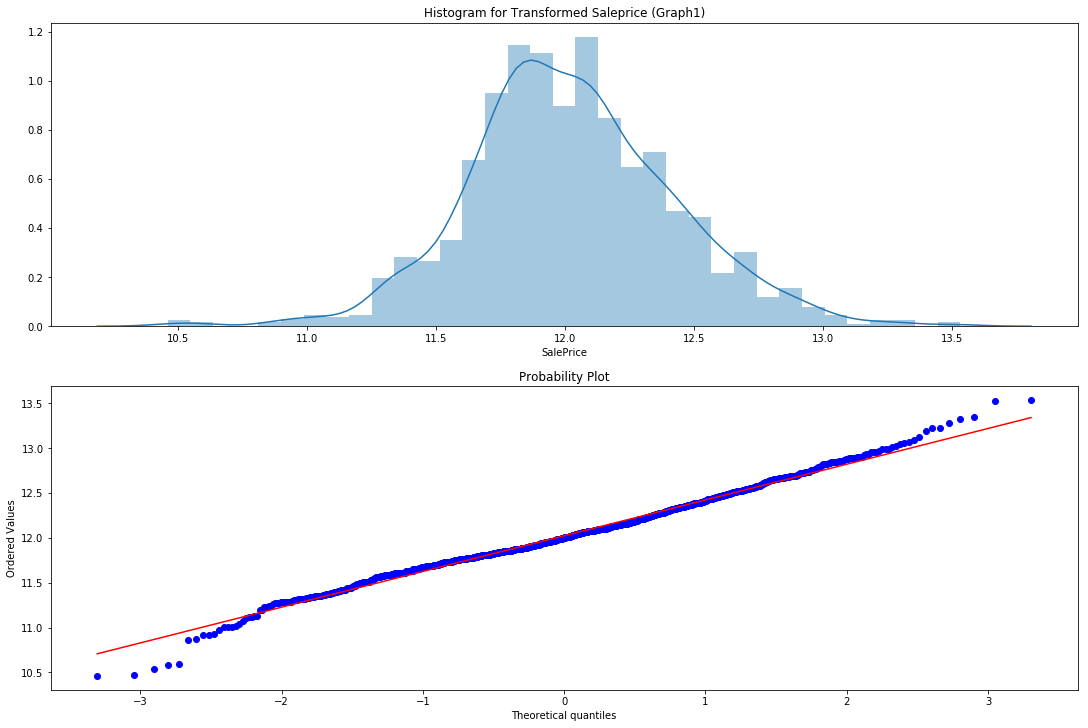

In [61]:
# Transforming the target variable to conform to normal distribution
# Log-transforming the target variable i.e. SalePrice
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

saleprice_xform_figure=plt.figure(constrained_layout=True,figsize=(15,10))
saleprice_xform_grid = saleprice_xform_figure.add_gridspec(2,1)

hist_xform_plot=saleprice_xform_figure.add_subplot(saleprice_xform_grid[0,:])
hist_xform_plot.set_title('Histogram for Transformed Saleprice (Graph1)')
sns.distplot(df_train.SalePrice,norm_hist=True, ax = hist_xform_plot)

qq_xform_plot=saleprice_xform_figure.add_subplot(saleprice_xform_grid[1,:])
qq_xform_plot.set_title('QQ plot for Transformed Saleprice (Graph2)')
stats.probplot(df_train['SalePrice'], plot = qq_xform_plot)

## Dealing with missing values.
 - Missing values have associated with them the following questions:
    - How prevalent are they ?
    - Are they random or is there a discernible pattern ?
 - These questions are important because:
    - Missing data implies a reduction in the dataset
    - We need to be sure that deletion of rows containing missing data does not accidentally remove relevant information.

In [62]:
# function that takes in a dataframe as input & returns a dataframe of two columns
# features containing missing data &
# percentage of missing data in each of them.
def percent_missing_values(df):
    total_missing=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
    percent_missing=(df.isnull().sum().sort_values(ascending = False)/len(df)*100)[(df.isnull().sum().sort_values(ascending=False)/len(df)*100)!=0]
    return pd.concat([total_missing, percent_missing], axis=1, keys=['Total','Percent'])

In [63]:
missing_values_train=percent_missing_values(df_train)
missing_values_test=percent_missing_values(df_test)

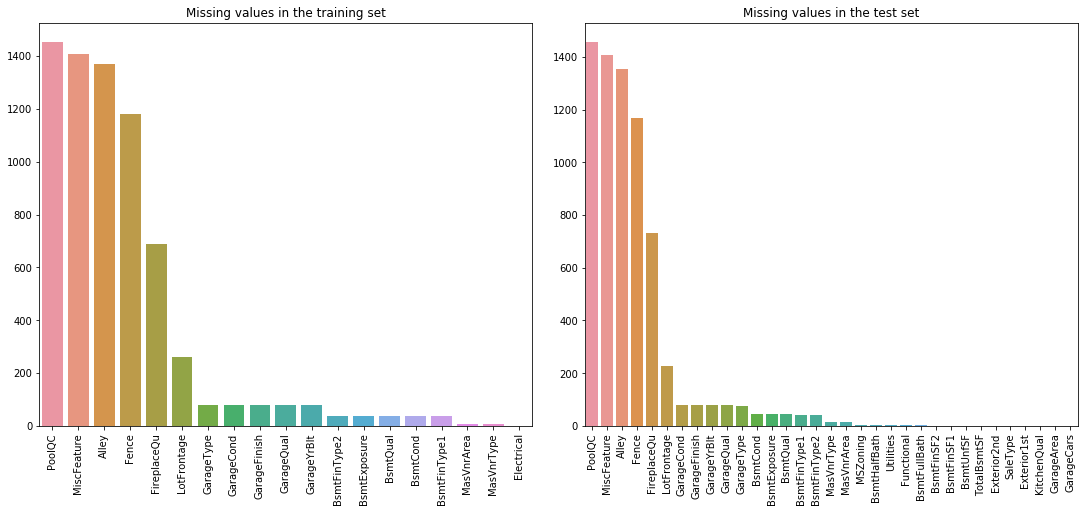

In [64]:
# These plots reveal that missing values are equally distributed in the training & test data
# A common method to handle the missing values needs to be used.
missing_values_figure=plt.figure(constrained_layout=True,figsize=(15,7))
missing_values_grid = missing_values_figure.add_gridspec(1,2)

missing_values_train_graph=missing_values_figure.add_subplot(missing_values_grid[0,:1])
missing_values_train_graph.set_title('Missing values in the training set')
missing_values_train_plot=sns.barplot(missing_values_train.index,missing_values_train['Total'].values,ax=missing_values_train_graph)
_= missing_values_train_plot.set_xticklabels(missing_values_train_plot.get_xticklabels(),rotation=90)

missing_values_test_graph=missing_values_figure.add_subplot(missing_values_grid[0,1:])
missing_values_test_graph.set_title('Missing values in the test set')
missing_values_test_plot=sns.barplot(missing_values_test.index,missing_values_test['Total'].values,ax=missing_values_test_graph)
_= missing_values_test_plot.set_xticklabels(missing_values_test_plot.get_xticklabels(),rotation=90)

In [65]:
# The first step in dealing with missing data is to delete columns which have more than a certain percentage of data missing
# The threshold in our dataset will be 30%, i.e if a column has more than 30% of the data missing, we can remove the entire
# column from our training dataframe
df_train=df_train.drop((missing_values_train[missing_values_train['Percent']>30]).index,1)
df_test=df_test.drop((missing_values_test[missing_values_test['Percent']>30]).index,1)

In [66]:
# Next, we will impute the other columns with values for missing data
# For this, first we check which columns have numeric data & which have categorical data
all_data_train=df_train[missing_values_train.index[5:]].columns
numerical_data_train=df_train[missing_values_train.index[5:]]._get_numeric_data().columns
print("Numerical Data: ", numerical_data_train)
categorical_data_train=list(set(all_data_train)-set(numerical_data_train))
print("Categorical Data: ", categorical_data_train)

all_data_test=df_test[missing_values_test.index[5:]].columns
numerical_data_test=df_test[missing_values_test.index[5:]]._get_numeric_data().columns
print("Numerical Data: ", numerical_data_test)
categorical_data_test=list(set(all_data_test)-set(numerical_data_test))
print("Categorical Data: ", categorical_data_test)

Numerical Data:  Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')
Categorical Data:  ['Electrical', 'GarageType', 'BsmtQual', 'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'BsmtCond']
Numerical Data:  Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'GarageArea', 'GarageCars'],
      dtype='object')
Categorical Data:  ['Functional', 'KitchenQual', 'GarageType', 'MSZoning', 'BsmtQual', 'BsmtExposure', 'GarageQual', 'Utilities', 'Exterior1st', 'GarageFinish', 'SaleType', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'Exterior2nd', 'BsmtCond']


In [67]:
for column in numerical_data_train:
    df_train[column]=df_train.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.median()))
    
for column in numerical_data_test:
    df_test[column]=df_test.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.median()))
    
# Impute missing values in categorical data
# Usually missing data in categorical columns is filled using the mode of the observations
# Here also it makes sense to group the data by neighbourhood first.

for column in categorical_data_train:
    df_train[column]=df_train.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.mode().iloc[0]))
    
for column in categorical_data_test:    
    df_test[column]=df_test.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.mode().iloc[0]))    

In [68]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


## Transforming skewed predictor variables to conform to normal distribution

In [69]:
numerical_features_train=df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of training set numerical features
numerical_features_train_skewed = df_train[numerical_features_train].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_train = pd.DataFrame({'Skew_Train' :numerical_features_train_skewed})

numerical_features_test=df_test.dtypes[df_test.dtypes != "object"].index

# Check the skew of test set numerical features
numerical_features_test_skewed = df_train[numerical_features_test].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_test = pd.DataFrame({'Skew_Test' :numerical_features_test_skewed})

In [70]:
print("There are {} skewed training set numerical features to Box Cox transform".format(skewness_train.shape[0]))
print("There are {} skewed test set numerical features to Box Cox transform".format(skewness_test.shape[0]))

There are 37 skewed training set numerical features to Box Cox transform
There are 36 skewed test set numerical features to Box Cox transform


In [71]:
skewed_features_train = skewness_train.index
skewed_features_test = skewness_test.index
lam = 0.15

for feature in skewed_features_train:
    df_train[feature] = boxcox1p(df_train[feature], lam)

for feature in skewed_features_test:
    df_test[feature] = boxcox1p(df_test[feature], lam)

## Correlation heatmap to find the correlation between variables and check if there is multicollinearity in the dataset

In [72]:
# We will choose features which have more than 0.15 as the correlation co-efficient & form a new dataset
df_train_corr=df_train.corr().sort_values(by=["SalePrice"],ascending=False).iloc[0].sort_values(ascending=False)

In [73]:
index=[]
df_train_sp=df_train['SalePrice']
for i in range(0,len(df_train_corr)):
    if df_train_corr[i] > 0.15 and df_train_corr.index[i]!='SalePrice':
        index.append(df_train_corr.index[i])

df_train_new=df_train[index]   
df_train_new.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt',
       'FullBath', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea',
       'Fireplaces', 'OpenPorchSF', 'TotalBsmtSF', 'MasVnrArea', 'LotArea',
       'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFullBath', 'BsmtFinSF1',
       'BsmtUnfSF', 'BedroomAbvGr', '2ndFlrSF'],
      dtype='object')

In [74]:
# Now we will combine features that are closely correlated to form new columns
df_train_new['OverallQualCond'] = (df_train['OverallCond'] * df_train['OverallQual']) / 100.0
df_train_new['HouseAgeWhenSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train_new['GarageAgeWhenSold'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train_new['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF'] 
df_train_new['TotalPorchArea'] = df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_train_new['TotalBathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

df_test['OverallQualCond'] = (df_test['OverallCond'] * df_test['OverallQual']) / 100.0
df_test['HouseAgeWhenSold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['GarageAgeWhenSold'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF'] 
df_test['TotalPorchArea'] = df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']
df_test['TotalBathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))

In [75]:
original_cols=['OverallCond','OverallQual','YrSold','YearBuilt','YrSold','GarageYrBlt','TotalBsmtSF','1stFlrSF','2ndFlrSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']
final_cols=[]
for i in df_train_new.columns:
    if i not in original_cols and i!='SalePrice':
        final_cols.append(i)
df_train_new=df_train_new[final_cols]
df_train_new.columns

Index(['GrLivArea', 'GarageCars', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageArea',
       'Fireplaces', 'MasVnrArea', 'LotArea', 'LotFrontage', 'BsmtUnfSF',
       'BedroomAbvGr', 'OverallQualCond', 'HouseAgeWhenSold',
       'GarageAgeWhenSold', 'TotalSF', 'TotalPorchArea', 'TotalBathrooms'],
      dtype='object')

## Categorical data handling